In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [166]:
df = pd.read_csv('speeddating.csv')

In [167]:
selected_features = ['age', 'age_o', "attractive",'intelligence','match']


In [168]:
df = df[selected_features]
df = df.dropna()

<AxesSubplot:>

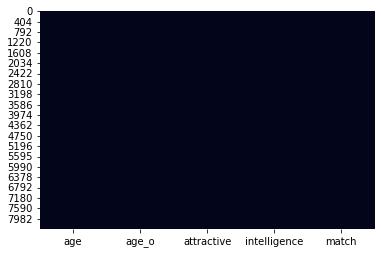

In [169]:
sns.heatmap(df.isnull(), cbar=False)

In [170]:
y = df.drop(columns = ['age', 'age_o', "attractive",'intelligence'])
y = np.array(y)
X = df.drop(columns=["match"])
X = pd.get_dummies(X)
X = np.array(X)

In [173]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, shuffle = True)

LogReg = LogisticRegression(random_state=0).fit(X_train, y_train)

LogReg.score(X_test, y_test)

/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8321048321048321

In [178]:
DecTree = DecisionTreeClassifier(random_state=0,max_depth=10)

cross_val = cross_val_score(DecTree, X_train, y_train, cv=10)

print(np.mean(cross_val),'\n',cross_val)

0.8274233034255234 
 [0.82982456 0.83333333 0.82631579 0.82280702 0.81929825 0.82982456
 0.83304042 0.82073814 0.82249561 0.83655536]


In [158]:
RandTree = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=100)

cross_val = cross_val_score(RandTree, X, y, cv=10)

print(np.mean(cross_val),'\n',cross_val)

/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/felipe/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConvers

0.829039206523869 
 [0.83312883 0.80368098 0.83558282 0.8208589  0.82331288 0.83558282
 0.83435583 0.83435583 0.83538084 0.83415233]
